In [1]:
#============================================================
# ▶ 모듈 불러오기
#============================================================
# 시스템
import sys
import os
import re
import time

# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  

# 기타
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [3]:
#============================================================
# ▶ 설정
#============================================================

# 한글폰트 설정 2
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='./resources/fonts/NotoSansKR-Regular.otf').get_name()
rc('font',family=font_name)


In [11]:
df = pd.read_csv('./data/한국인구통계2002-2022수정본.csv')
df.head(4)

,Year,Region,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity
0,2000,Busan,5.8,2.5,7.5,5.8,False,True
1,2000,Chungcheongbuk-do,7.3,1.7,6.6,7.7,False,False
2,2000,Chungcheongnam-do,9.0,2.0,6.5,5.7,False,False
3,2000,Daegu,5.3,2.0,7.4,9.1,False,True


In [12]:
df2 = pd.read_csv('./data/지역별1인당경제소득.csv')
df2

,Year,Region,1인당 개인소득
0,2002,Whole country,9820
1,2003,Whole country,10389
2,2004,Whole country,11063
3,2005,Whole country,11551
4,2006,Whole country,12058
...,...,...,...
373,2018,Jeju,18456
374,2019,Jeju,18815
375,2020,Jeju,19954
376,2021,Jeju,20360


In [13]:
merged_df = pd.merge(df, df2, how="outer", on=["Region", "Year"])
merged_df

,Year,Region,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity,1인당 개인소득
0,2000,Busan,5.8,2.5,7.5,5.8,False,True,NaN
1,2000,Busan,4.8,2.7,6.8,7.2,False,True,NaN
2,2000,Busan,5.0,2.8,6.3,7.2,False,True,NaN
3,2000,Busan,4.9,2.3,5.5,6.2,False,True,NaN
4,2000,Busan,4.4,2.7,7.7,6.5,False,True,NaN
...,...,...,...,...,...,...,...,...,...
4721,2022,Whole country,7.4,1.8,3.9,-2.2,False,False,23388
4722,2022,Whole country,10.2,1.8,3.5,-4.9,False,False,23388
4723,2022,Whole country,8.7,1.7,3.7,-3.7,False,False,23388
4724,2022,Whole country,6.6,1.9,3.9,-2.0,False,False,23388


In [16]:
## 결측치 처리
# 데이터 타입 확인
print(merged_df["1인당 개인소득"].dtype)

# 숫자형으로 변환 (문자열이 포함된 경우 처리)
merged_df["1인당 개인소득"] = pd.to_numeric(merged_df["1인당 개인소득"], errors="coerce")


# 결측치를 Region별 평균값으로 대체
merged_df["1인당 개인소득"] = merged_df.groupby("Region")["1인당 개인소득"].transform(
    lambda x: x.fillna(x.mean())
)
merged_df

float64


,Year,Region,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity,1인당 개인소득
0,2000,Busan,5.8,2.5,7.5,5.8,False,True,15013.341463
1,2000,Busan,4.8,2.7,6.8,7.2,False,True,15013.341463
2,2000,Busan,5.0,2.8,6.3,7.2,False,True,15013.341463
3,2000,Busan,4.9,2.3,5.5,6.2,False,True,15013.341463
4,2000,Busan,4.4,2.7,7.7,6.5,False,True,15013.341463
...,...,...,...,...,...,...,...,...,...
4721,2022,Whole country,7.4,1.8,3.9,-2.2,False,False,23388.000000
4722,2022,Whole country,10.2,1.8,3.5,-4.9,False,False,23388.000000
4723,2022,Whole country,8.7,1.7,3.7,-3.7,False,False,23388.000000
4724,2022,Whole country,6.6,1.9,3.9,-2.0,False,False,23388.000000


In [34]:
# 데이터 저장
merged_df.to_csv('./data/저출산-가설2데이터.csv',index=False)
merged_df.head(3)

,Year,Region,Death_rate,Divorce_rate,Marriage_rate,Natural_growth_rate,Is_Capital,Is_bigcity,1인당 개인소득
0,2000,Busan,5.8,2.5,7.5,5.8,False,True,15013.341463
1,2000,Busan,4.8,2.7,6.8,7.2,False,True,15013.341463
2,2000,Busan,5.0,2.8,6.3,7.2,False,True,15013.341463


<Axes: xlabel='1인당 개인소득', ylabel='Natural_growth_rate'>

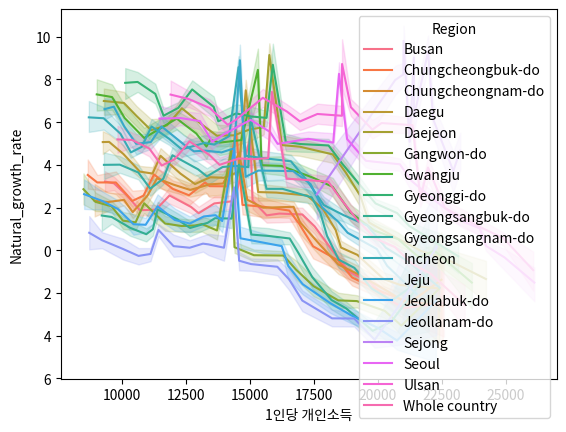

In [35]:
sns.lineplot(x=merged_df["1인당 개인소득"], y=merged_df["Natural_growth_rate"],hue=merged_df["Region"])


In [25]:
# 지역별 평균 계산 (1인당 개인소득과 자연 증가율)
grouped_df = merged_df.groupby("Region")[["1인당 개인소득", "Natural_growth_rate"]].mean()
grouped_df


,1인당 개인소득,Natural_growth_rate
Region,,
Busan,15013.341463,1.504815
Chungcheongbuk-do,14450.365854,1.969259
Chungcheongnam-do,14579.048780,1.771852
Daegu,14834.390244,2.906667
Daejeon,15755.365854,4.711481
Gangwon-do,14258.902439,0.542963
Gwangju,15308.317073,4.298148
Gyeonggi-do,15892.878049,5.337407
Gyeongsangbuk-do,14567.243902,0.467778


In [26]:
# 상관계수 계산
correlation = grouped_df["1인당 개인소득"].corr(grouped_df["Natural_growth_rate"])

print(f"지역별 경제 수준과 출산율의 상관계수: {correlation:.2f}")


지역별 경제 수준과 출산율의 상관계수: 0.72


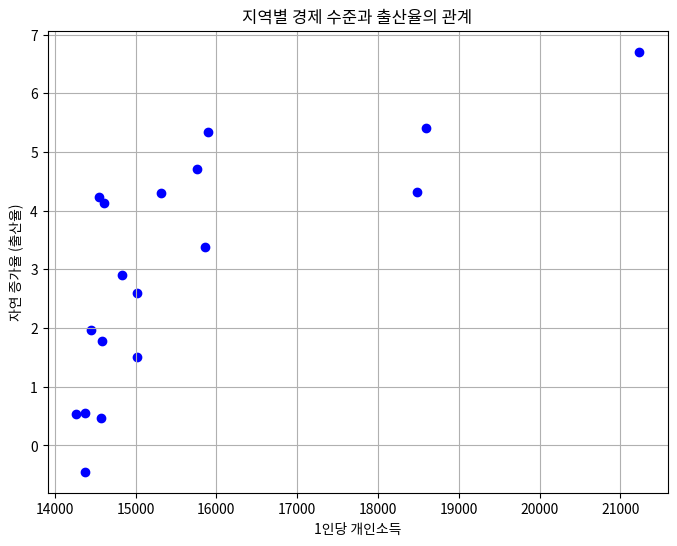

In [27]:
# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(grouped_df["1인당 개인소득"], grouped_df["Natural_growth_rate"], color="blue")
plt.title("지역별 경제 수준과 출산율의 관계")
plt.xlabel("1인당 개인소득")
plt.ylabel("자연 증가율 (출산율)")
plt.grid(True)
plt.show()


In [32]:
# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.lineplot(x=grouped_df["1인당 개인소득"], y=grouped_df["Natural_growth_rate"],hue=grouped_df["Rigion"])
plt.title("지역별 경제 수준과 출산율의 관계")
plt.xlabel("1인당 개인소득")
plt.ylabel("자연 증가율 (출산율)")
plt.show()


KeyError: 'Rigion'

<Figure size 800x600 with 0 Axes>

In [ ]:
# 가설2 : 지역별 경제 수준과 출산율의 상관관계가 높을것이다.
# -> 소득이 올라갈수록 출산률이 증가한다.